In [3]:
#TODO:
#incorporate the lost sets as a new peice of data
#add filter for type of tomato

In [4]:
#This block only looks at the precent of set flowers

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widg
import copy

In [5]:
Number_of_Data_Sets = 9
Truss_Level = 101
a=[0]*Number_of_Data_Sets
    
Data_Set = 9
df = pd.read_csv('C:\\Users\\Reily\\Desktop\\Beeyond Data\\data_set_'+str(Data_Set)+'.csv')
df = df.fillna(0)
df.columns = [c.replace(' ', '_') for c in df.columns]

#make a unrefrenced copy of our data frame
df1 = copy.deepcopy(df)

#reduce data by truss level
df2 = df1.loc[(df1.Truss == Truss_Level)]

#group data by device
dfGroupByDevice = df2.groupby(df2.Device).sum()

#normalize the setting flowers per device based on total flowers per device

dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting

dfGroupByDevice.Broken_Sets = dfGroupByDevice.Broken_Sets.div(dfGroupByDevice.Total_flowers)
dfGroupByDevice.Broken_Sets = 100*dfGroupByDevice.Broken_Sets

#making data frame of device and percent setting
dfGroupByDevice = dfGroupByDevice[['Setting','Broken_Sets']]
dfGroupByDevice = dfGroupByDevice.Setting+dfGroupByDevice.Broken_Sets
dfGroupByDevice.columns = ['% Setting + % Broken_Sets Day ' + str(Data_Set)]
dfGroupByDevice

Device
A    48.888889
B    51.794872
C    53.361345
E    27.868852
F    57.142857
dtype: float64

In [10]:
Number_of_Data_Sets = 9
Truss_Level = 101
a=[0]*Number_of_Data_Sets
a1 =['']*Number_of_Data_Sets
for i in range(1,Number_of_Data_Sets+1):
    Data_Set = i
    df = pd.read_csv('C:\\Users\\Reily\\Desktop\\Beeyond Data\\data_set_'+str(Data_Set)+'.csv')
    df = df.fillna(0)
    df.columns = [c.replace(' ', '_') for c in df.columns]

    #make a unrefrenced copy of our data frame
    df1 = copy.deepcopy(df)

    #reduce data by truss level
    df2 = df1.loc[(df1.Truss == Truss_Level)]

    #group data by device
    dfGroupByDevice = df2.groupby(df2.Device).sum()

    #normalize the setting flowers per device based on total flowers per device

    dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
    dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting
    dfGroupByDevice.Broken_Sets = dfGroupByDevice.Broken_Sets.div(dfGroupByDevice.Total_flowers)
    dfGroupByDevice.Broken_Sets = 100*dfGroupByDevice.Broken_Sets

    #making data frame of device and percent setting
    dfGroupByDevice = dfGroupByDevice[['Setting','Broken_Sets']]
    #dfGroupByDevice = dfGroupByDevice.sum(axis=1)
    dfGroupByDevice.columns = ['% Setting' + str(Data_Set),' % Broken_Sets Day ' + str(Data_Set)]
    a[i-1]= dfGroupByDevice
    
bigFrame = pd.concat(a, axis=1)
bigFrame


,% Setting1,% Broken_Sets Day 1,% Setting2,% Broken_Sets Day 2,% Setting3,% Broken_Sets Day 3,% Setting4,% Broken_Sets Day 4,% Setting5,% Broken_Sets Day 5,% Setting6,% Broken_Sets Day 6,% Setting7,% Broken_Sets Day 7,% Setting8,% Broken_Sets Day 8,% Setting9,% Broken_Sets Day 9
Device,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,4.060914,0,17.766497,0,20.370370,0,31.400966,0,47.272727,1.818182,45.777778,3.111111
B,0,0,0,0,0,0,3.743316,0,16.384181,0,23.529412,0,33.516484,0,37.647059,5.490196,45.641026,6.153846
C,0,0,0,0,0,0,2.790698,0,20.642202,0,23.684211,0,37.719298,0,45.957447,2.978723,50.000000,3.361345
E,0,0,0,0,0,0,0.000000,0,5.691057,0,7.438017,0,10.655738,0,23.015873,2.380952,26.229508,1.639344
F,0,0,0,0,0,0,3.243243,0,18.461538,0,26.470588,0,31.914894,0,47.191011,1.123596,57.142857,0.000000


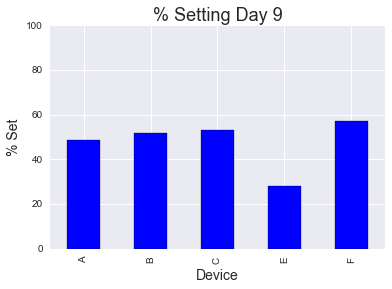

In [44]:
def plotData(day):
    plt.xlabel('Treatment', fontsize = 14)
    plt.ylabel('% Set', fontsize = 14)
    plt.title('% Setting Day ' + str(int (day)),fontsize = 18)
    plt.grid(False)
    plt.ylim([0,100])
    bigFrame['% Setting + % Broken_Sets Day ' + str(int (day))].plot(kind='bar',)

timeSlider = widg.FloatSlider(description='Time', min=1, max=Number_of_Data_Sets, step=1)

widg.interact(plotData,
            day=timeSlider)